<h1><center>TREND TYPES</center></h1>

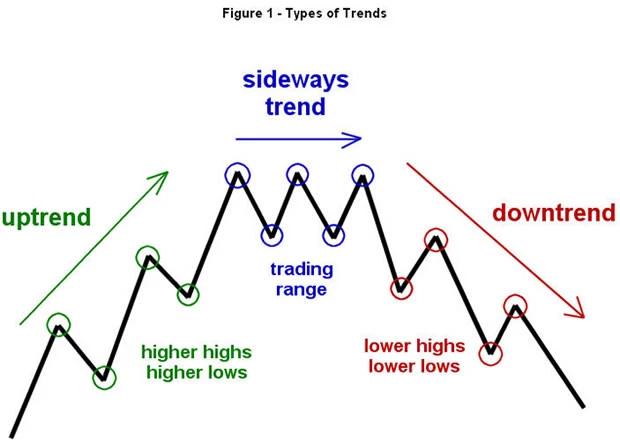

<h1><center>SEASONALITY</center></h1>

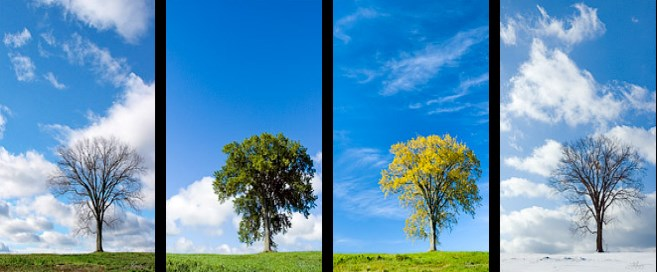

<h1><center>Seasonal Data</center><h1>

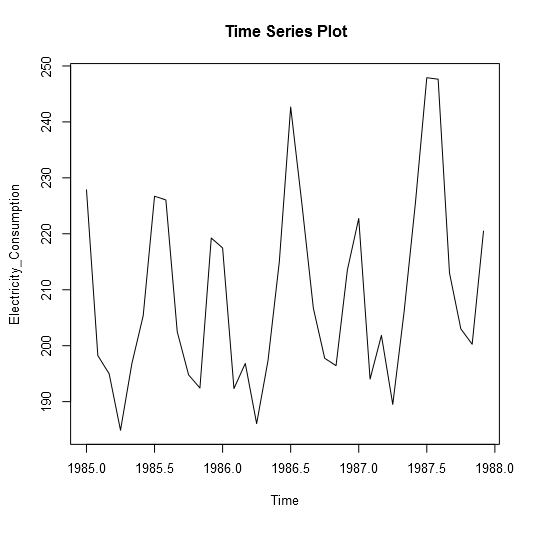

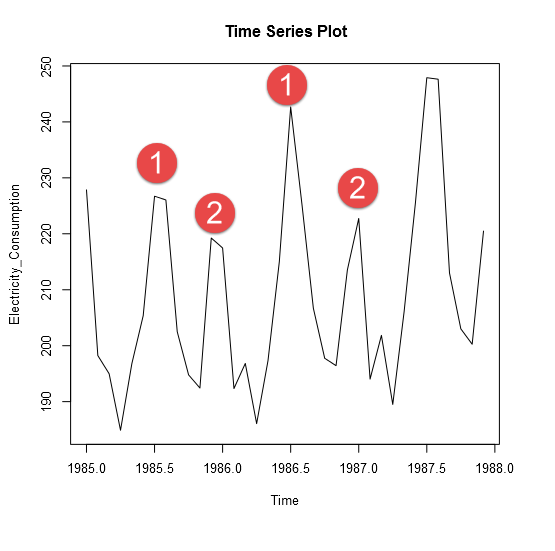

<h3><center>Seasonal - Peak electricity in summer and winter months repeats every year</center></h3>

<h1><center>Cylical</center><h1>

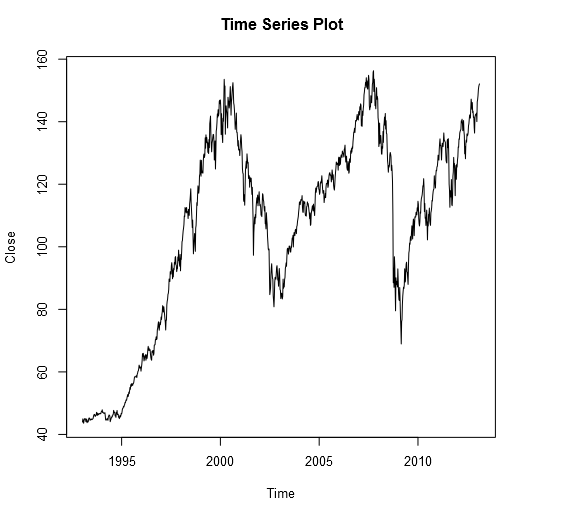

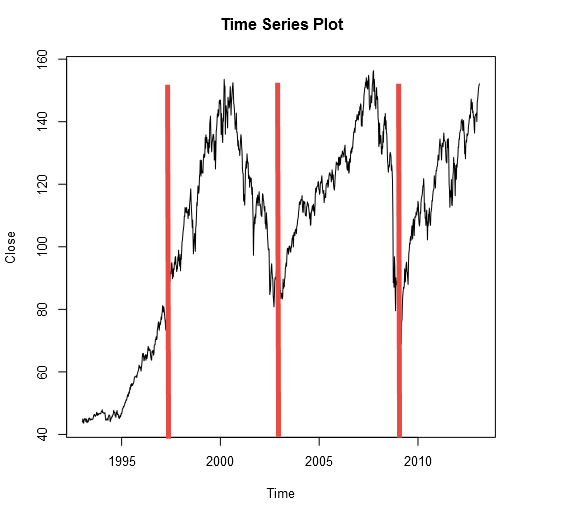

<h3><center>Cyclical - shows pattern of downtrend every few years. The years are not fixed though.</center></h3>

## Neither

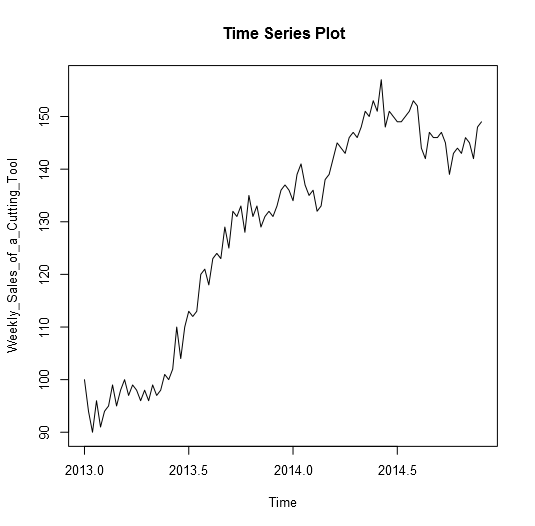

<h5><center>None - There doesn't appear to be any cyclical or seasonal pattern in this time series.</center></h5>

## BOTH

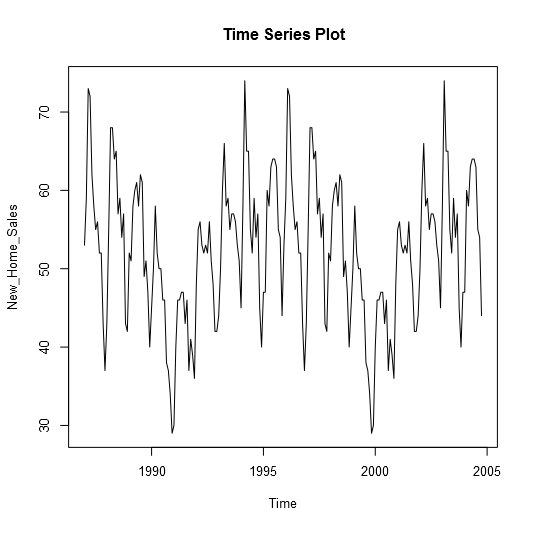

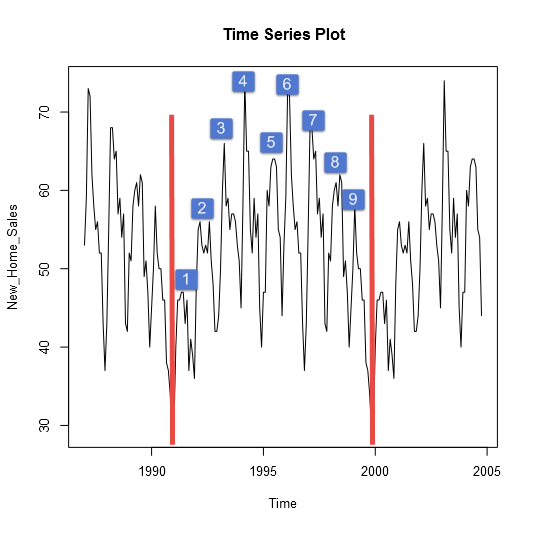

<h5><center>#4 Both - Seasonal patterns each year with cyclical pattern showing about every 9 years</center></h5>

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv('https://bit.ly/2PM6wcp' ,index_col=[0], parse_dates=True)
df.columns = ['conc']
df.head()

,conc
Timestamp,
1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,17.1


<h3><center>Time Series Decomposition</center></h3>

The frequency of decomposition must be an interval, which 'may' repeat. So we have data with 2hour frequency and we are looking for 1day repetition of behavior.

$decompfreq = \cfrac{24h \cdot 60 min}{2*60 min} \cdot 1 days$

In [3]:
decompfreq = int(24*60/(2*60)*1)

In [4]:
res = sm.tsa.seasonal_decompose(df.conc, freq=decompfreq, model='additive')


Observerd : Shows the actual time series

Seasonal : the seasonal portion shows us that there are seasonal pattern, 
we can see in our Bates Hotel bookings that seasonal only occurs at regular intervals and with increasing magnitude, 
meaning bookings are increasing at a larger rate each seasonal turn. 

Trend : Our trend line indicates the general course or tendency of the time series. It is a centered moving 
average of the time series, 
and fits between the seasonal peaks and valleys. This line is considered deseasonalized. 

Residual : The remainder is the error in the model that calculates the difference between the observed value and
the trendline estimate. It's the piece that's not accounted for by combining the seasonal piece and the trend piece.
All time series will have this residual error to help explain what trend and seasonality cannot. 
Making use of the trend, seasonal and error plots shown together in our decomposition plot allows us to 
identify these main components of the time series.



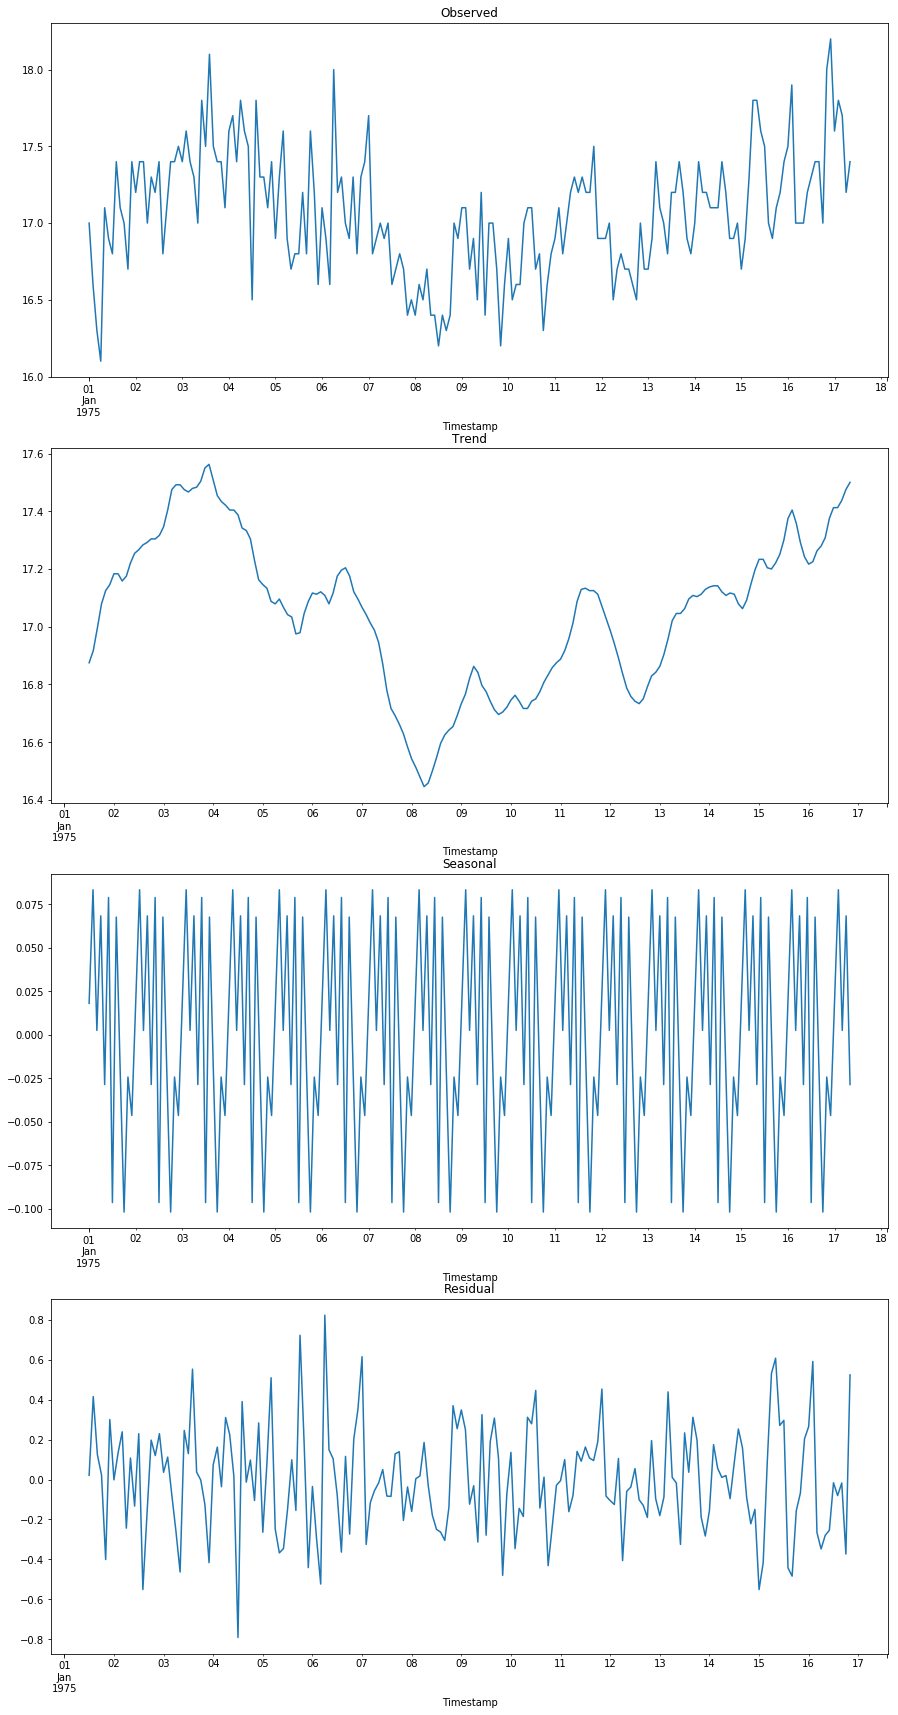

In [5]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,30))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.seasonal.plot(ax=ax3, title='Seasonal')
res.resid.plot(ax=ax4, title='Residual')
plt.show()

<h3><center>Additive Decomposition - Multiplicative Decomposition</center></h3>

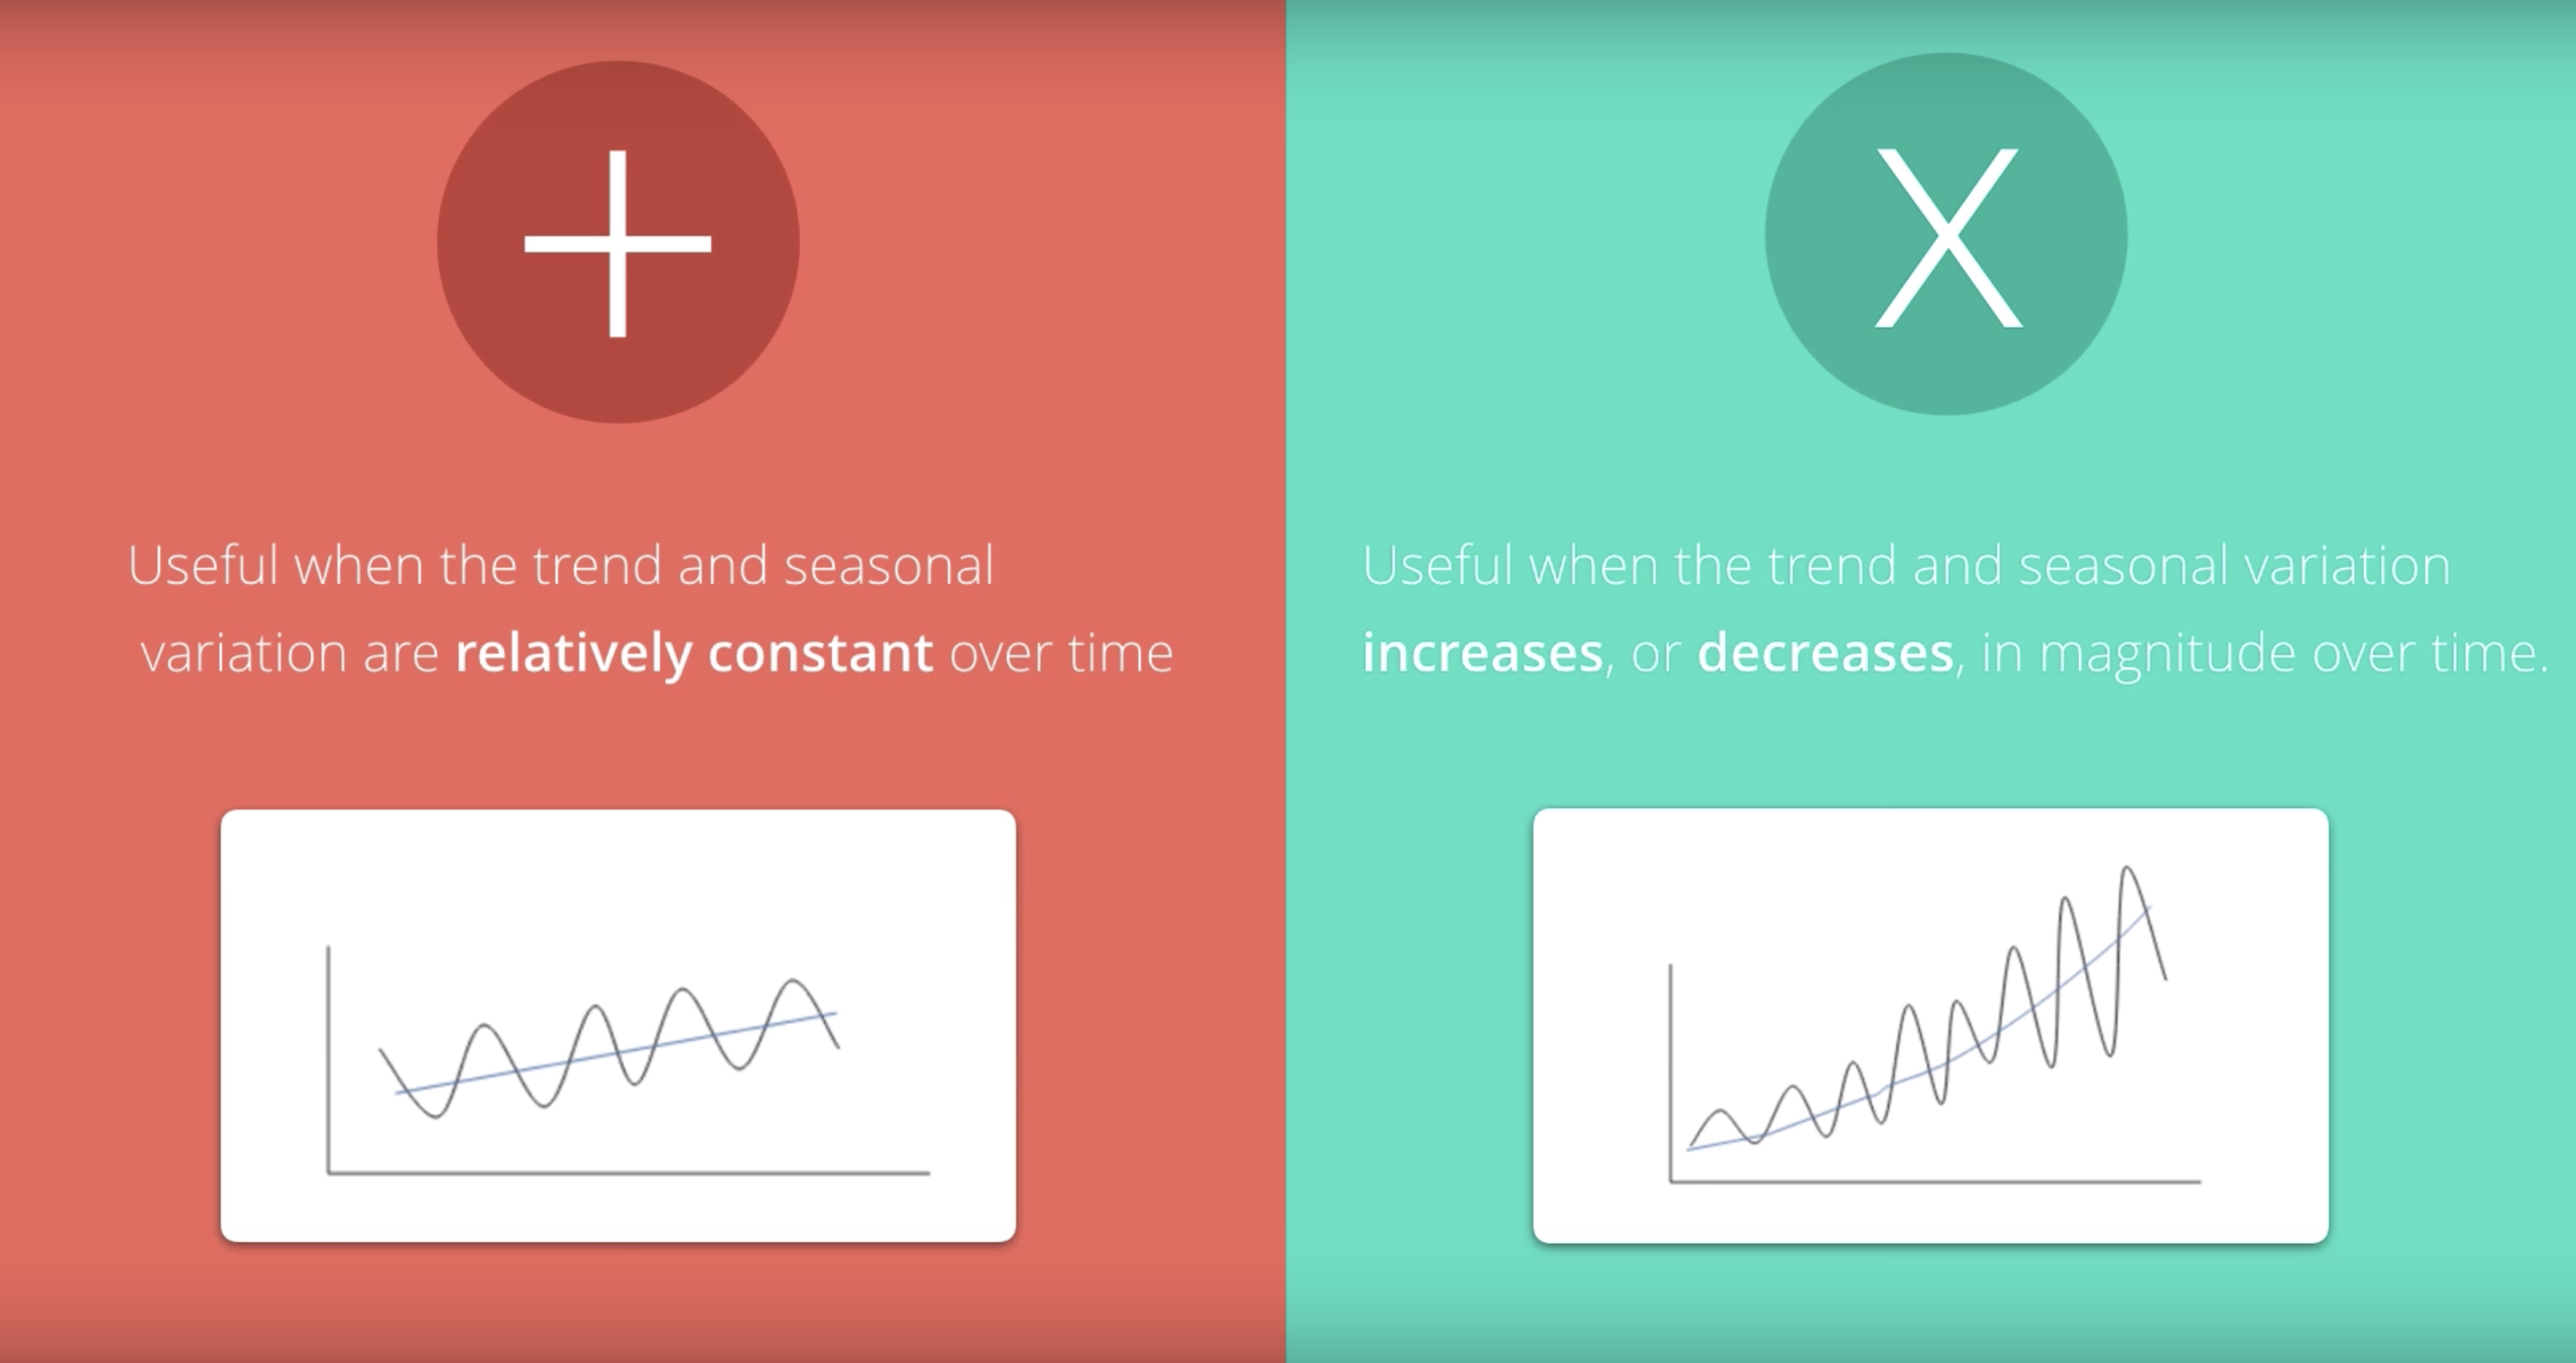

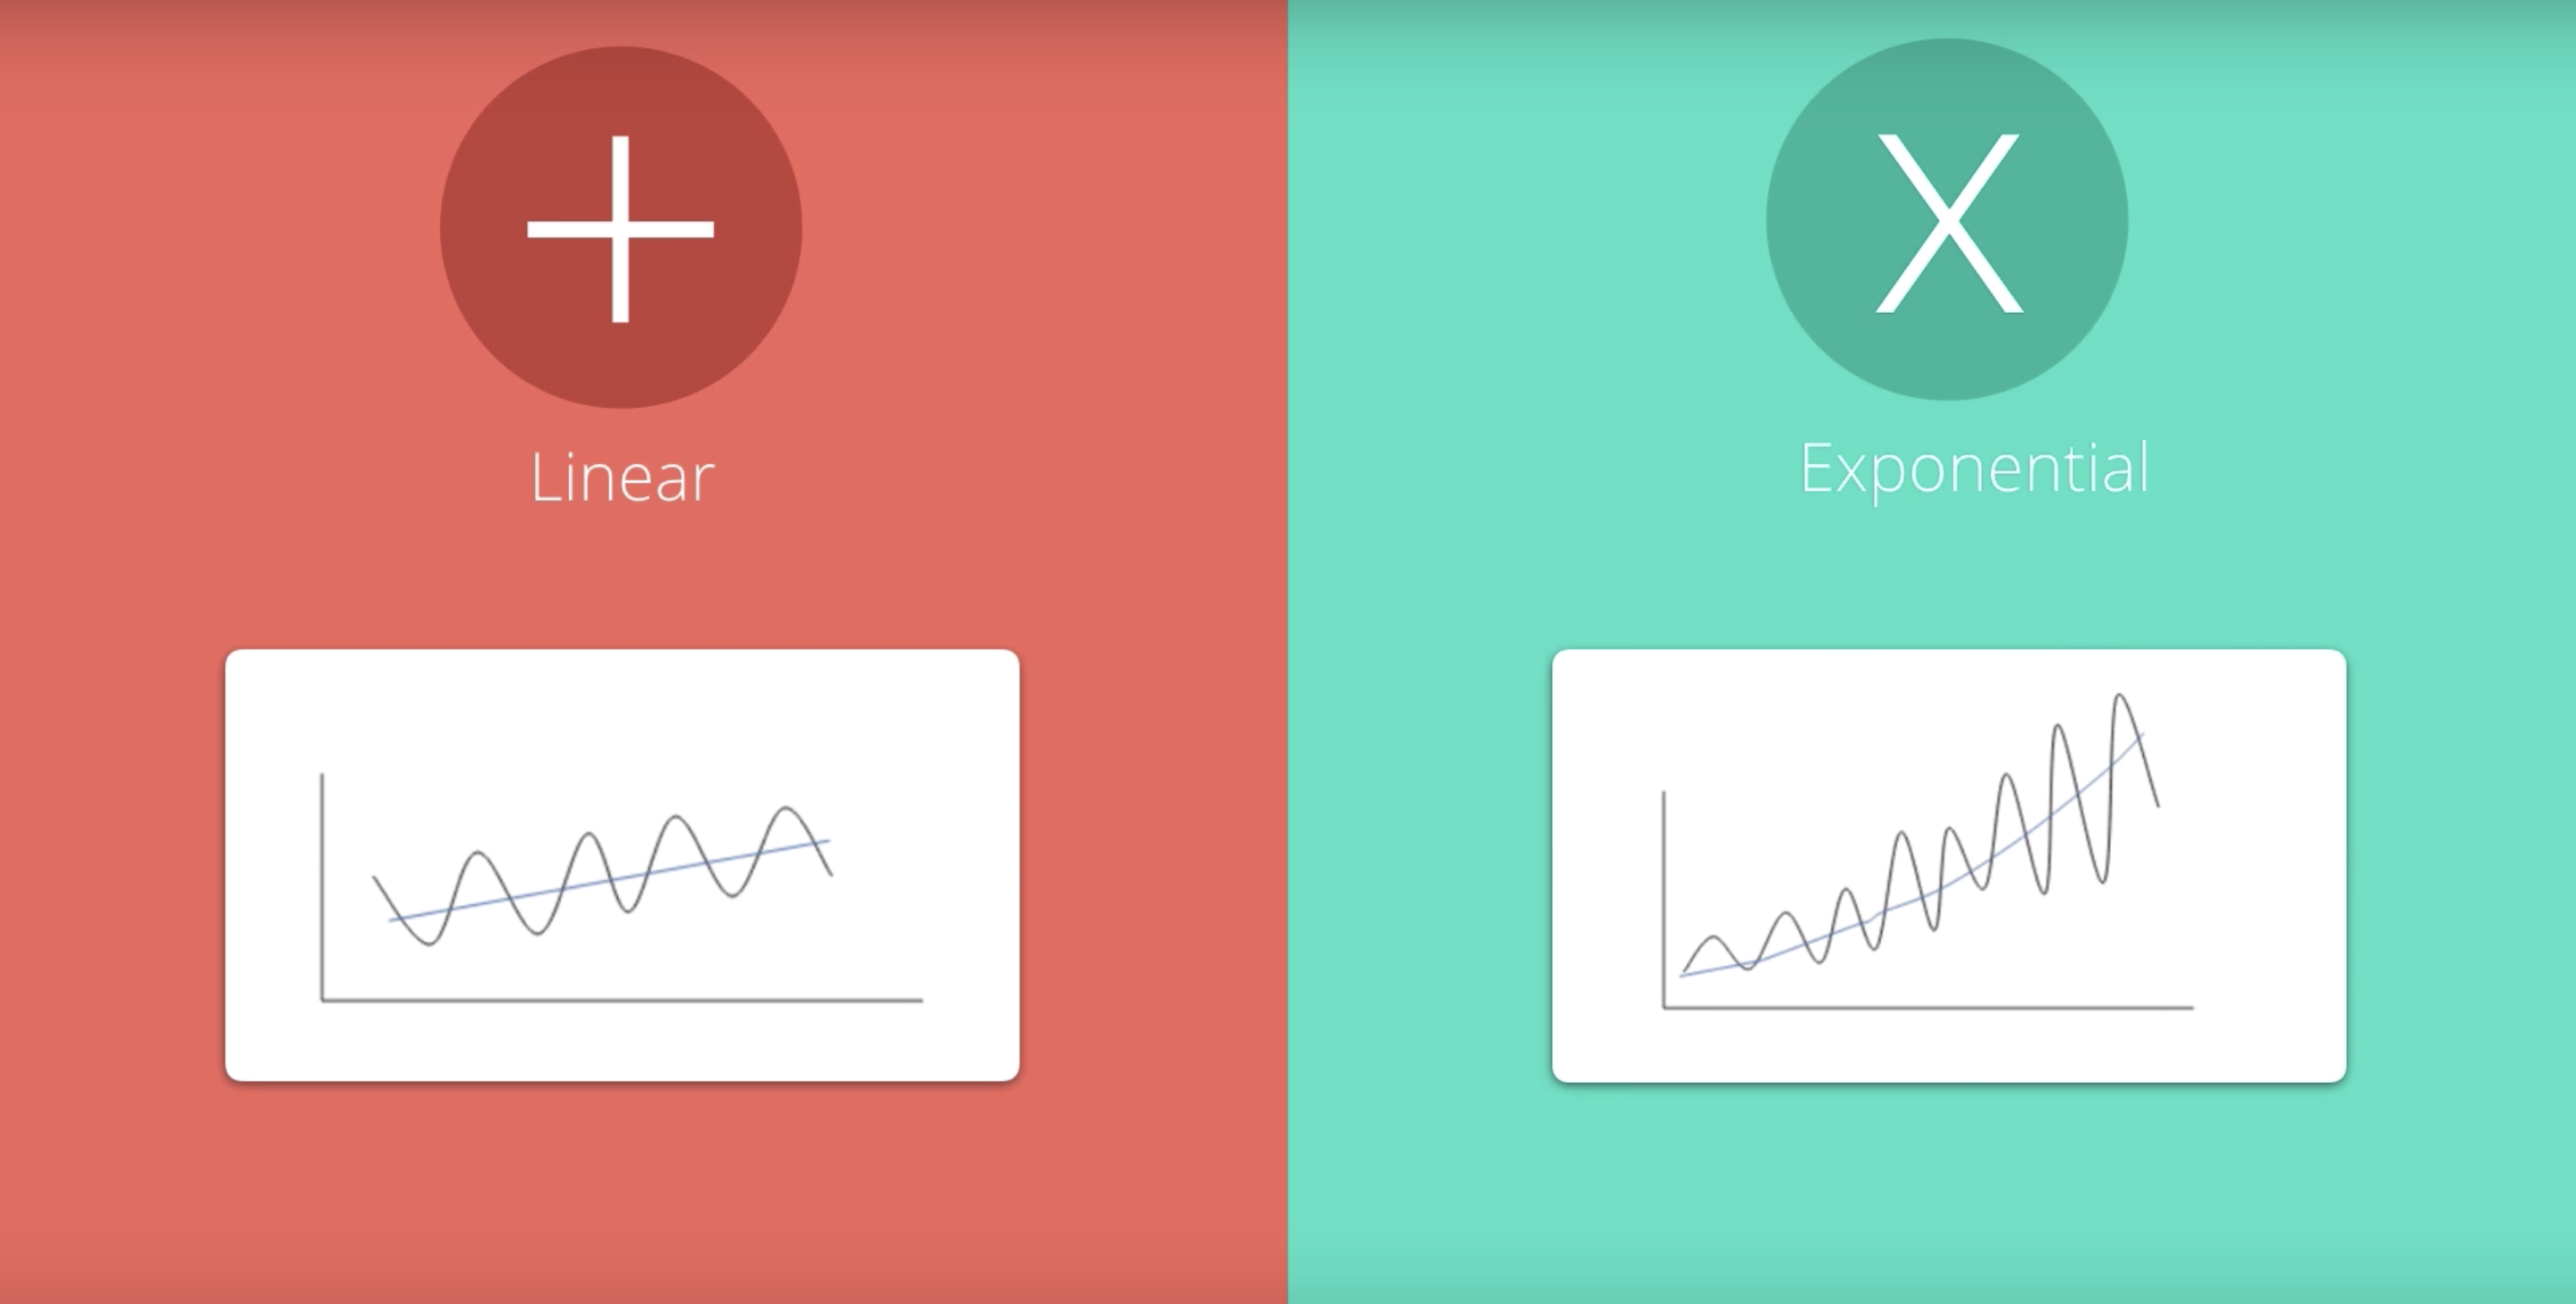

In [6]:
def visualize_decomposition(series, decompfreq, model='additive'):
    res = sm.tsa.seasonal_decompose(series.interpolate(), freq=int(decompfreq), model=model)
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,15))
    res.observed.plot(ax=ax1, title='Observed')
    res.trend.plot(ax=ax2, title='Trend')
    res.seasonal.plot(ax=ax3, title='Seasonal')
    res.resid.plot(ax=ax4, title='Residual')
    plt.show()

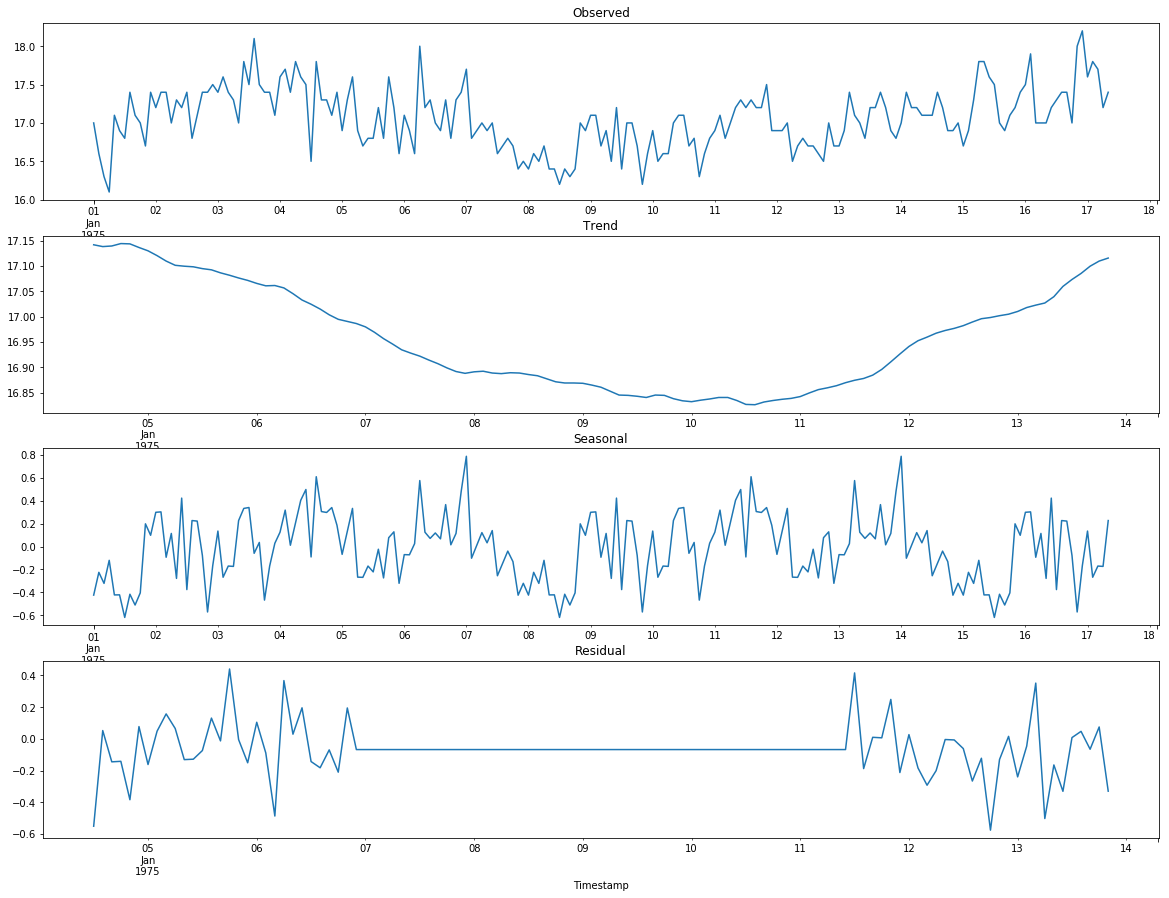

In [15]:
# 1 Week, additive
visualize_decomposition(df.conc, 24*60/(2*60)*7, model='additive')

<h3><center> FIRSTLY </center></h3>
<br>Time Series Data has a trend?<br>
- If yes, is the trend increasing linearly or exponentially?<br>

<br>Time Series data has seasonality?<br>
- If yes, do the seasonal components increase in magnitude over time?

<h3><center>Scenarios</center></h3>
<h5>Therefore the scenarios could be:</h5>

- No-Trend, No-Seasonal
- No-Trend, Seasonal-Constant
- No-Trend, Seasonal-Increasing
- Trend-Linear,No-Seasonal
- Trend-Linear,Seasonal-Constant
- Trend-Linear,Seasonal-Increasing
- Trend-Exponential,No-Seasonal
- Trend-Exponential,Seasonal-Constant
- Trend-Exponential,Seasonal-Increasing


<br>As you can see there are nine possible scenarios.



# References

- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
- https://classroom.udacity.com/courses/ud980